# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Question 1

In [2]:
img = cv.imread('boat.jpg')
# Convert the image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Otsu thresholding
ret, th = cv.threshold(img_gray, 40, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# Find the min and max coordinate of the masked element
pts = np.argwhere(th>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

# divide y coordinate by half to avoid drawing the boundary box on the reflection
new_y2 = y1 + (y2 - y1)//2
th_rect = cv.rectangle(img,(x1,y1),(x2, new_y2),(255,0,0),2)

cv.imshow('boundary', img) 
cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

In [3]:
img = cv.imread('leaf.jfif', 0)

# Create trackbar
def trackbar(x):
    kernel = np.ones((x,x), np.uint8)
    
    # four type: erosion, dilation, opening and closing
    erosion = cv.erode(img, kernel, iterations = 1)
    dilation = cv.dilate(img, kernel, iterations = 1)
    opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    
    cv.imshow('morphological transformation', 
              np.hstack([erosion, dilation, opening, closing]))

cv.namedWindow('morphological transformation')
cv.createTrackbar('size', 'morphological transformation', 1, 25, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

# Question 3

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

## Take porcelain5 as a test case

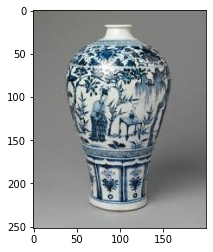

In [5]:
img = cv.imread('porcelain5.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

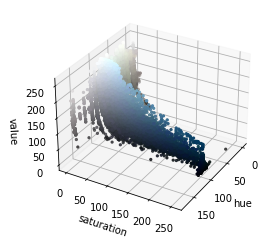

In [6]:
# hsv color space
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

# Normalize the color range to show color for each pixel
pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = 0, vmax = 1)
norm.autoscale(pixel_colors)
pixel_colors= norm(pixel_colors).tolist()

# Plot
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor = pixel_colors,
            marker = ".")
axis.view_init(30, 30) # modify the value for different angle
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

HSV colour space:

blue - low: (85, 25, 250), high: (115, 245, 255)

white - low: (0, 0, 200), high: (179, 30, 255)

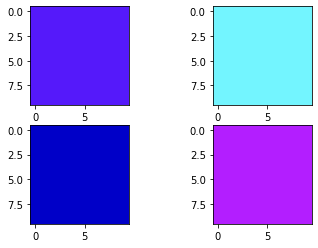

In [7]:
# Verify the value
low_blue = (85, 25, 250)
high_blue = (115, 245, 255)
low_white = (0, 0, 200)
high_white = (179, 30, 255)

square_low_blue = np.full((10, 10, 3), low_blue, dtype = np.uint8)/255.0
square_high_blue = np.full((10, 10, 3), high_blue, dtype = np.uint8)/255.0
square_low_white = np.full((10, 10, 3), low_white, dtype = np.uint8)/255.0
square_high_white = np.full((10, 10, 3), high_white, dtype = np.uint8)/255.0

plt.subplot(2, 2, 1)
plt.imshow(square_low_blue)
plt.subplot(2, 2, 2)
plt.imshow(square_high_blue)
plt.subplot(2, 2, 3)
plt.imshow(square_low_white)
plt.subplot(2, 2, 4)
plt.imshow(square_high_white)
plt.show()

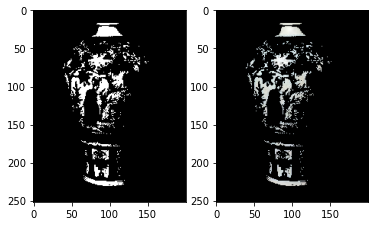

In [8]:
# Mask blue and white
mask = cv.inRange(img_hsv, low_blue, high_blue)
mask2 = cv.inRange(img_hsv, low_white, high_white)

# Combine the masks into one
new_mask = cv.bitwise_or(mask, mask2)

res = cv.bitwise_and(img, img, mask = new_mask)

plt.subplot(1, 2, 1)
plt.imshow(new_mask, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

## Output porcelain1 to porcelain5

In [9]:
porcelain_list = [] # used to store images
result = [] # used to store segmentation results

for i in range(0, 5):
    img = cv.imread('porcelain'+str(i+1)+'.jfif')
    
    # Resize the image
    img = cv.resize(img, (200, 200), interpolation = cv.INTER_CUBIC)
    
    # Convert the image into hsv colorspace
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # mask the image
    mask = cv.inRange(img_hsv, low_blue, high_blue)
    mask2 = cv.inRange(img_hsv, low_white, high_white)
    new_mask = cv.bitwise_or(mask, mask2)
    
    # append the result into a new array
    res = cv.bitwise_and(img_hsv, img_hsv, mask = new_mask)
    result.append(cv.cvtColor(res, cv.COLOR_HSV2RGB))
    
    # Convert the image into rgb color space
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    porcelain_list.append(img)
    
    
    # mask the image
    mask = cv.inRange(img_hsv, low_blue, high_blue)
    mask2 = cv.inRange(img_hsv, low_white, high_white)
    new_mask = cv.bitwise_or(mask, mask2)

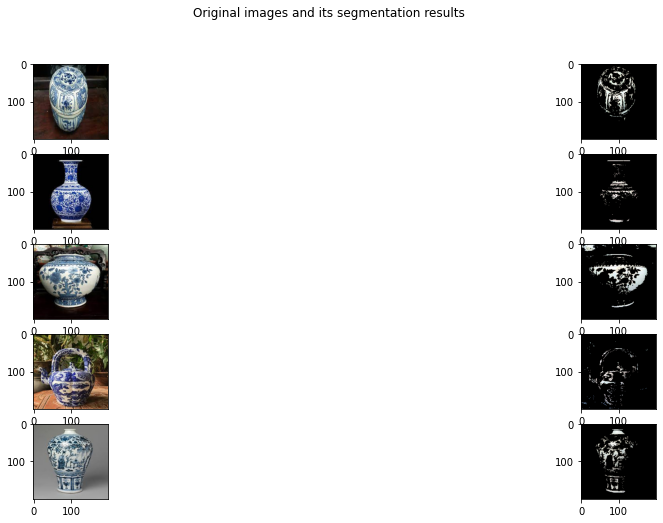

In [10]:
# Initiate a big figure
# plt.figure(figsize=(18, 8))
f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(result[i])

f.suptitle('Original images and its segmentation results')
plt.show()